In [75]:
import json

import gensim
from gensim.models import Word2Vec

import pandas as pd

import nltk
from nltk.stem import WordNetLemmatizer

import re

from sklearn.decomposition import PCA, KernelPCA

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [76]:
# nltk.download('punkt')
# nltk.download('stopwords')


# Loading reviews

In [77]:
# # Read reviews
# # Data obtained from https://jmcauley.ucsd.edu/data/amazon/
# with open('Musical_Instruments_5.json') as data_file:
#     def load_review(line):
#         review = json.loads(line)
#         return [float(review['overall']), review['reviewText']]
#     reviews = list(map(load_review, data_file))

In [78]:
# reviews[0]

In [79]:
# review_df = pd.DataFrame(reviews, columns=['Rating', 'Text'])

In [80]:
# review_df

In [81]:
# en_stop = set(nltk.corpus.stopwords.words('english'))
# stemmer = WordNetLemmatizer()

# def tokenize(text):
#     text = text.lower()
#     # Remove non-word characters
#     text = re.sub(r'[^a-z]', ' ', text)
#     # Remove single characters
#     text = re.sub(r'\b[a-z]\b', ' ', text)
#     text = re.sub(r'\s+', ' ', text)

#     # Lemmatization
#     tokens = text.split()
#     tokens = [stemmer.lemmatize(word) for word in tokens]
#     tokens = [word for word in tokens if len(word) >= 3 and word not in en_stop]
    
#     return tokens

In [82]:
# tokenized_texts = list(map(tokenize, review_df['Text']))

In [83]:
# str(tokenized_texts[:2])

# Creating w2v model

In [84]:
model_file = 'musical_instruments_review_word2vec_len3.model' # change every time!

In [85]:
# model = Word2Vec(sentences=tokenized_texts)
# model.save(model_file)

In [86]:
model = Word2Vec.load(model_file)

# PCA stuff

In [87]:
vocab = np.array(list(model.wv.key_to_index.keys()))
num_words, = vocab.shape
print('Vocab has ', num_words, 'words')
vocab[:10]

Vocab has  5352 words


array(['guitar', 'one', 'string', 'sound', 'great', 'like', 'good', 'use',
       'pedal', 'well'], dtype='<U15')

In [88]:
vectors = model.wv[model.wv.index_to_key]

In [89]:
pd.DataFrame(vectors)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.614343,0.488139,0.772052,-0.002569,-0.674580,-1.470332,-0.495658,-0.195630,0.008010,0.207078,...,0.485420,-0.320796,0.197416,0.143767,0.559240,0.715567,-0.558964,0.805933,-0.510249,0.022898
1,0.039033,-0.010707,0.298169,-0.260730,-0.249594,-0.846963,-0.510082,0.392693,-0.409967,-0.388688,...,-0.340968,0.377866,-0.284890,-0.144340,-0.326031,0.149230,-0.143424,0.525890,-0.203798,0.376248
2,0.388668,2.187849,0.395199,-0.179747,-0.351310,-1.120154,0.371329,1.198177,1.475197,-0.117167,...,1.136428,0.354706,0.281014,-0.002498,0.541059,0.984794,-1.223026,-0.446879,0.717248,0.040473
3,0.446773,1.789409,0.026896,0.545127,0.628971,-0.390700,1.004568,1.359485,0.753583,-1.096641,...,0.985497,0.851581,0.853598,0.271567,0.187432,0.650604,0.258975,0.037298,-0.327179,-0.796606
4,0.336516,-0.057997,-0.078187,0.539876,0.026997,-0.154860,0.018858,0.687829,-0.123362,0.442210,...,0.170501,0.159002,0.237209,0.048241,0.200624,-1.127668,0.123737,0.785334,-0.336422,0.167563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,-0.005638,0.045417,-0.003012,0.004624,0.017924,-0.044492,-0.008495,0.069548,-0.008526,-0.009445,...,0.010474,0.012147,0.001727,0.015503,0.044808,0.018727,-0.003617,-0.010349,-0.012757,0.004160
5348,0.008682,0.072496,0.016032,-0.027734,0.013990,-0.100146,-0.010529,0.122256,-0.034664,-0.010503,...,0.053258,0.023202,-0.002827,0.009491,0.092655,0.045700,0.009233,-0.018406,-0.021970,-0.004381
5349,0.004303,0.053210,0.028906,-0.036759,-0.008029,-0.092137,-0.019506,0.114803,-0.018481,-0.019594,...,0.017046,0.036439,-0.003559,0.015374,0.041854,0.025719,-0.007031,-0.005005,-0.020646,0.015278
5350,0.017631,0.080970,0.024810,-0.015506,0.017699,-0.094154,0.006302,0.089393,-0.007363,-0.025395,...,0.048309,0.044499,0.013085,0.003266,0.059853,0.044589,-0.008716,-0.018859,-0.020540,0.001932


In [90]:
def try_pca(pca):
    pca = pca.fit(vectors)
    top = pca.explained_variance_ratio_
    print(top, sum(top))
    return pca

In [91]:
pca1 = try_pca(PCA(n_components=2))

[0.27380309 0.16453384] 0.43833692371845245


In [92]:
pca2 = try_pca(PCA(n_components=3))

[0.27380306 0.16453378 0.12288407] 0.5612209066748619


In [93]:
pca3 = try_pca(PCA(n_components=3, svd_solver='arpack'))

[0.27380309 0.16453372 0.12288404] 0.5612208396196365


In [94]:
pca4 = try_pca(PCA(n_components=3, svd_solver='full'))

[0.27380276 0.16453373 0.12288388] 0.5612203702330589


In [95]:
pca4 = try_pca(PCA(n_components=3, svd_solver='randomized'))

[0.2738029  0.16453385 0.1228842 ] 0.5612209588289261


In [96]:
pca5 = try_pca(PCA(n_components=4, svd_solver='arpack'))

[0.2738031  0.16453381 0.12288406 0.11539946] 0.6766204461455345


In [97]:
pca6 = try_pca(PCA(n_components=4, svd_solver='full'))

[0.27380276 0.16453373 0.12288388 0.1153993 ] 0.6766196712851524


In [98]:
pca7 = try_pca(PCA())

[2.7380276e-01 1.6453373e-01 1.2288388e-01 1.1539930e-01 8.6197175e-02
 5.1898073e-02 3.2899339e-02 3.0900786e-02 2.1327814e-02 1.6329339e-02
 1.4263014e-02 1.2851440e-02 1.2157113e-02 7.2173681e-03 6.2267291e-03
 4.3888632e-03 3.9077168e-03 3.1057594e-03 2.3137613e-03 1.9054117e-03
 1.8537502e-03 1.2555181e-03 1.1407845e-03 1.0611373e-03 9.7165816e-04
 7.9256488e-04 7.9148251e-04 6.0422451e-04 5.3964433e-04 4.9283740e-04
 4.4933893e-04 4.3447953e-04 4.0190213e-04 3.3435845e-04 3.1280264e-04
 2.7823905e-04 2.6667045e-04 2.3825090e-04 1.9753128e-04 1.8402714e-04
 1.6867222e-04 1.5902692e-04 1.4932144e-04 1.3191867e-04 1.2871505e-04
 1.1577173e-04 1.0902521e-04 9.5964198e-05 8.7052722e-05 7.8865793e-05
 7.6892618e-05 7.5782817e-05 7.3091142e-05 6.8008863e-05 6.3740714e-05
 6.1007064e-05 5.7185494e-05 5.4149361e-05 4.9828755e-05 4.7354832e-05
 4.6437439e-05 4.4302811e-05 4.1973155e-05 4.0158986e-05 3.8045004e-05
 3.6019119e-05 3.4980469e-05 3.4132187e-05 3.3994569e-05 3.2882577e-05
 3.126

In [99]:
pca8 = KernelPCA()
# try_pca(pca8)
# pca8

In [100]:
pca = pca2

In [101]:
pca_vectors = pca.transform(vectors)

In [102]:
pca_vectors.shape, pca_vectors

((5352, 3),
 array([[ 1.66622   , -3.4051306 ,  0.93042874],
        [ 1.2183628 , -1.1847968 , -0.34612364],
        [ 2.2203372 , -3.5161889 ,  5.649083  ],
        ...,
        [-0.7640289 , -0.09241701,  0.01357223],
        [-0.7766725 , -0.02730473,  0.07632767],
        [-0.88430387, -0.00851771,  0.00872969]], dtype=float32))

# Visualization

In [103]:
xdata, ydata, zdata = pca_vectors.transpose()

In [120]:
def show_words(words_to_pick, size_3d=(25, 25), size_2d=(10, 10), words=True, xlim=(-1.5, 3.0), ylim=(-6.5, 6.5)):
    # The indices of the words to pick in vocab
    indices = [np.where(word == vocab)[0][0] for word in words_to_pick]
    # Keep only the vectors for the selected words
    sel_x, sel_y, sel_z = [arr[indices] for arr in [xdata, ydata, zdata]]
    if words:
        print(words_to_pick, sel_x, sel_y, sel_z, sep='\n')
    
    cm = plt.cm.get_cmap('gist_rainbow')
    
    fig = plt.figure(figsize=size_3d)
    ax = plt.axes(projection='3d')
    # Plot the word, with the color depending on the distance from the origin
    plot = ax.scatter(sel_x, sel_y, sel_z, c=(sel_x ** 2 + sel_y ** 2 + sel_z ** 2) ** 0.5, cmap=cm)
    print(plot)
    # Add the word itself to that point
    if words:
        for word, x, y, z in zip(words_to_pick, sel_x, sel_y, sel_z):
            ax.text(x, y, z, word)
            
    plt.colorbar(plot)

    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    ax.set_zlabel('PCA Feature 3')
    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
#     ax.set_zlim(zlim[0], zlim[1])

    plt.show()
    
    fig = plt.figure(figsize=size_2d)
    ax = plt.axes()
    # Plot each word, with the third feature being a color
    plot = plt.scatter(sel_x, sel_y, c=sel_z, cmap=cm)
    # Add the word itself to that point
    if words:
        for word, x, y in zip(words_to_pick, sel_x, sel_y):
            ax.text(x, y, word)
        
    plt.colorbar(plot)
    
    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    plt.show()

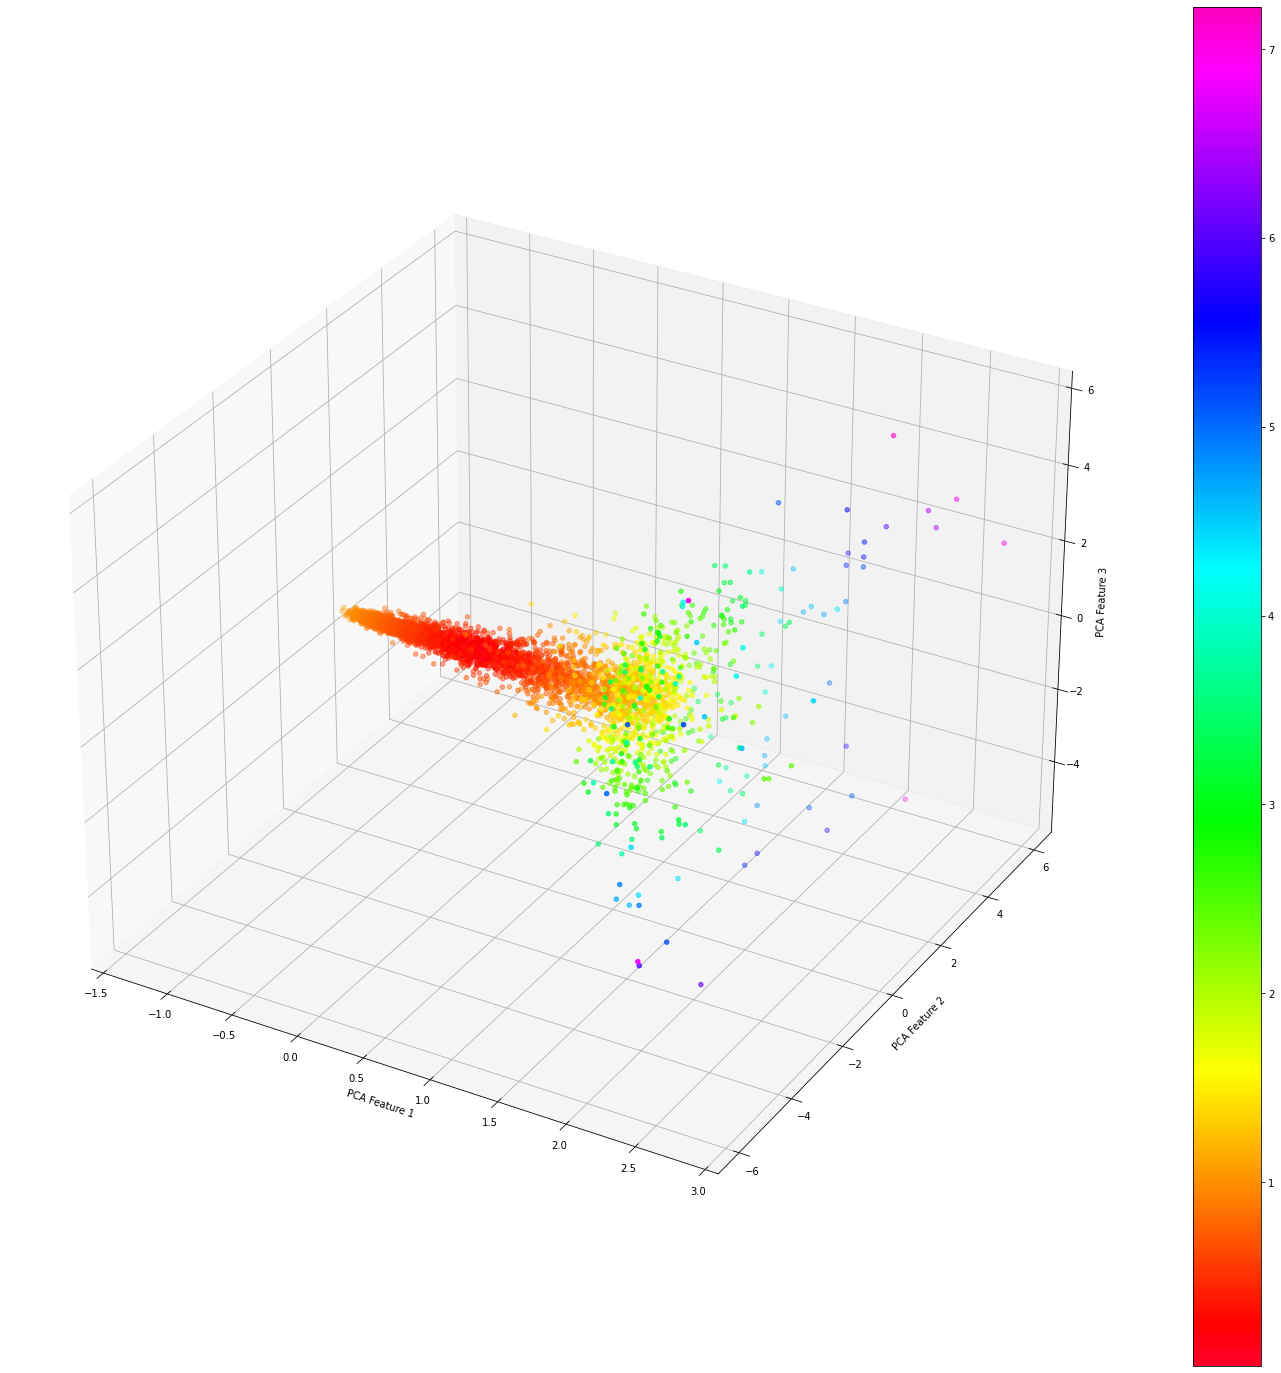

In [ ]:
show_words(vocab, words=False)

In [122]:
# # Randomly choose 10 words
# indices = np.random.choice(range(num_words), 10)

['guitar', 'piano', 'string', 'violin', 'viola', 'cello', 'drum', 'flute', 'trumpet']
[ 1.66622     0.9777176   2.2203372   1.7608186  -0.8888056  -0.8868805
  1.1517438  -0.58429563 -0.74807453]
[-3.4051306   0.1010575  -3.5161889  -1.6453099  -0.09194335 -0.10932481
  1.0061145  -0.03702813  0.00645061]
[ 9.3042874e-01  2.4735342e-01  5.6490831e+00  7.8693908e-01
  1.8022342e-02  4.6690084e-02 -1.1713891e+00 -2.6293587e-02
  4.0095774e-03]


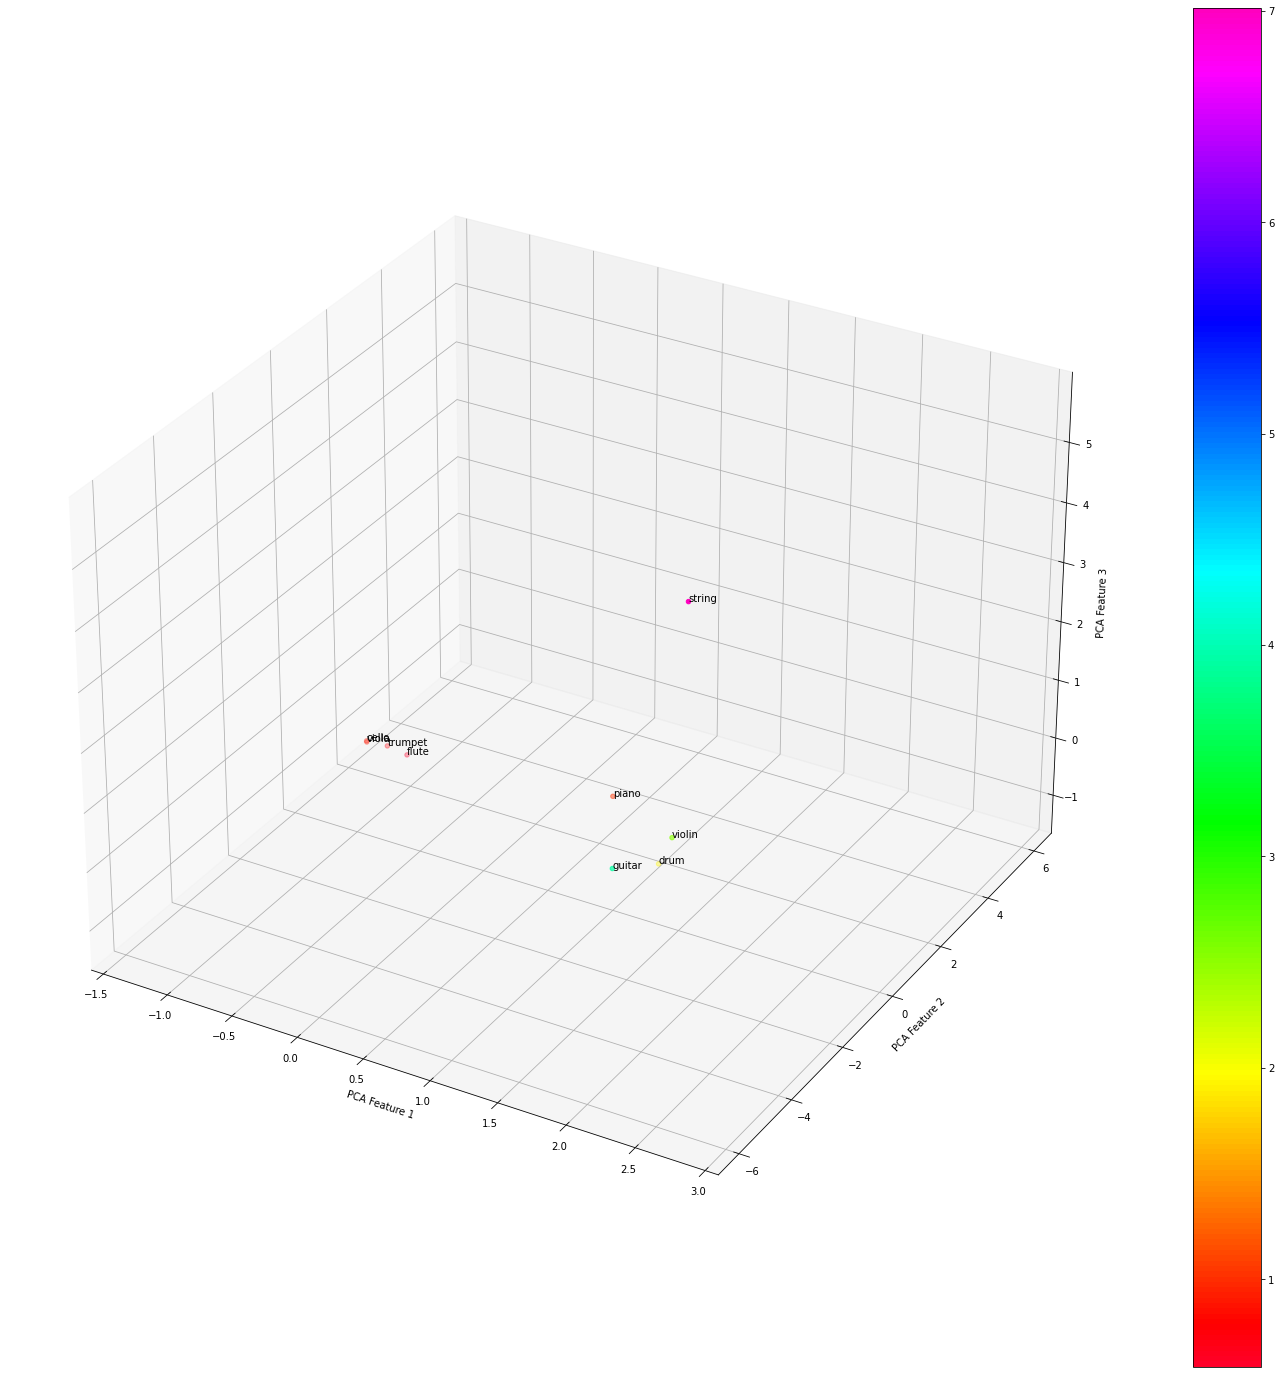

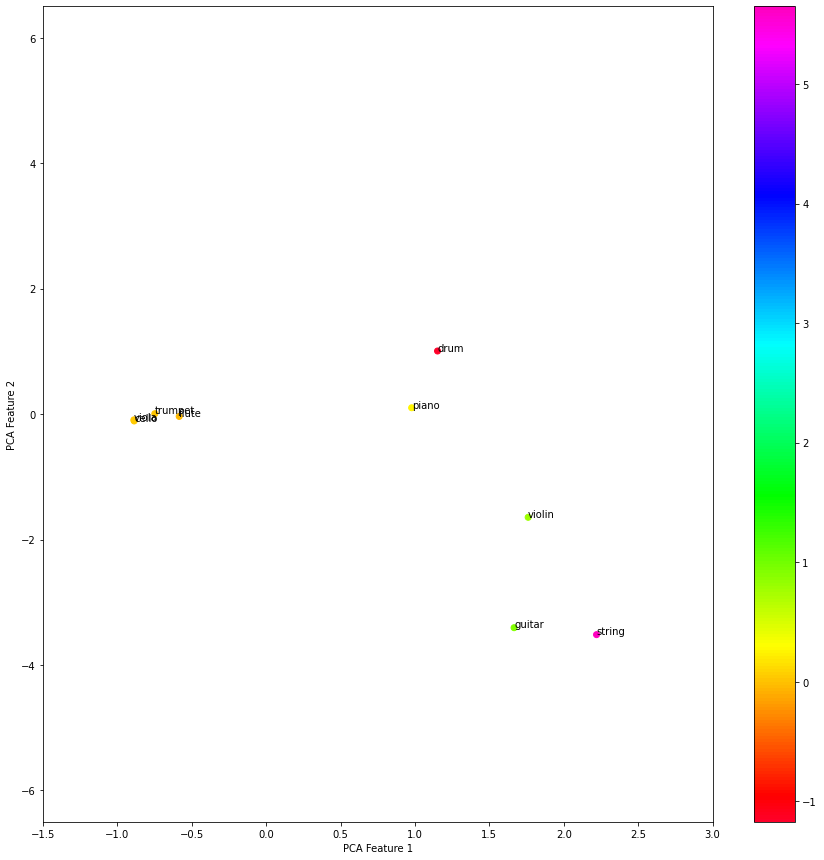

In [123]:
show_words(['guitar', 'piano', 'string', 'violin', 'viola', 'cello', 'drum', 'flute', 'trumpet'], size_2d=(15, 15))

-2
['good', 'great', 'nice', 'well', 'excellent', 'love', 'perfect', 'comfortable', 'durable', 'smooth', 'remarkable', 'bad', 'terrible', 'horrible', 'flimsy', 'inferior', 'uncomfortable', 'difficult', 'waste', 'suck', 'clunky', 'unusable', 'dead', 'unnecessary']
[ 1.7262995   1.6679395   1.6518493   1.7696042   1.290247    1.3663706
  1.2264462   1.6941282   1.6143061   1.736972   -0.74377126  1.1333709
  0.70688033  0.53202987  0.862642   -0.51505584  0.2108066   1.421473
  0.32918388  0.61328405 -0.8209874  -0.18300742  1.0935683  -0.17480564]
[ 0.11974435  0.3033326  -0.5642667  -1.1302586   0.6869665  -0.7923898
 -0.93460804 -2.558832   -0.9149762   0.82111305  0.05155416  1.1955588
 -0.0344707   0.1049076  -0.40927103  0.0192371  -0.2547961  -0.6528318
 -0.14683917  0.6843876  -0.06228383  0.13602374 -0.08623538  0.1539214 ]
[ 0.8871713   0.85757697  0.86040854 -0.9369234  -0.20054998  2.0699177
 -0.5005884   0.47209734 -0.02493224  1.827247    0.04132263  1.0671432
  0.18270363 

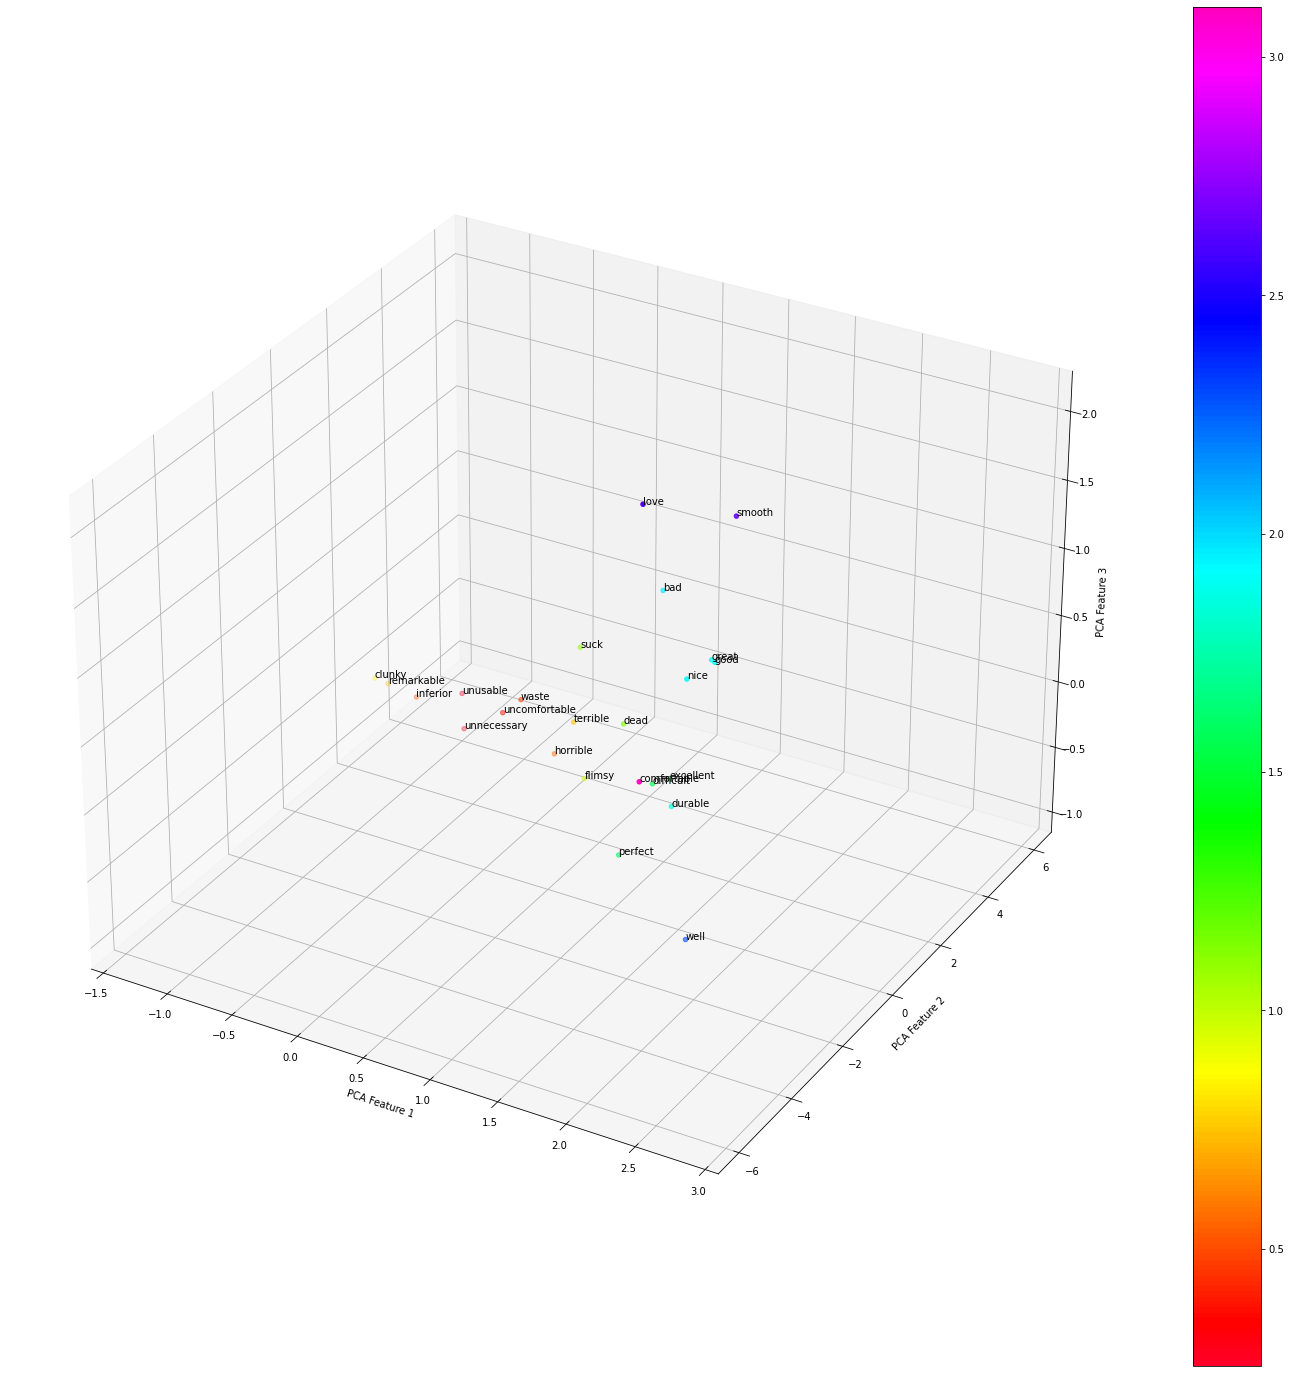

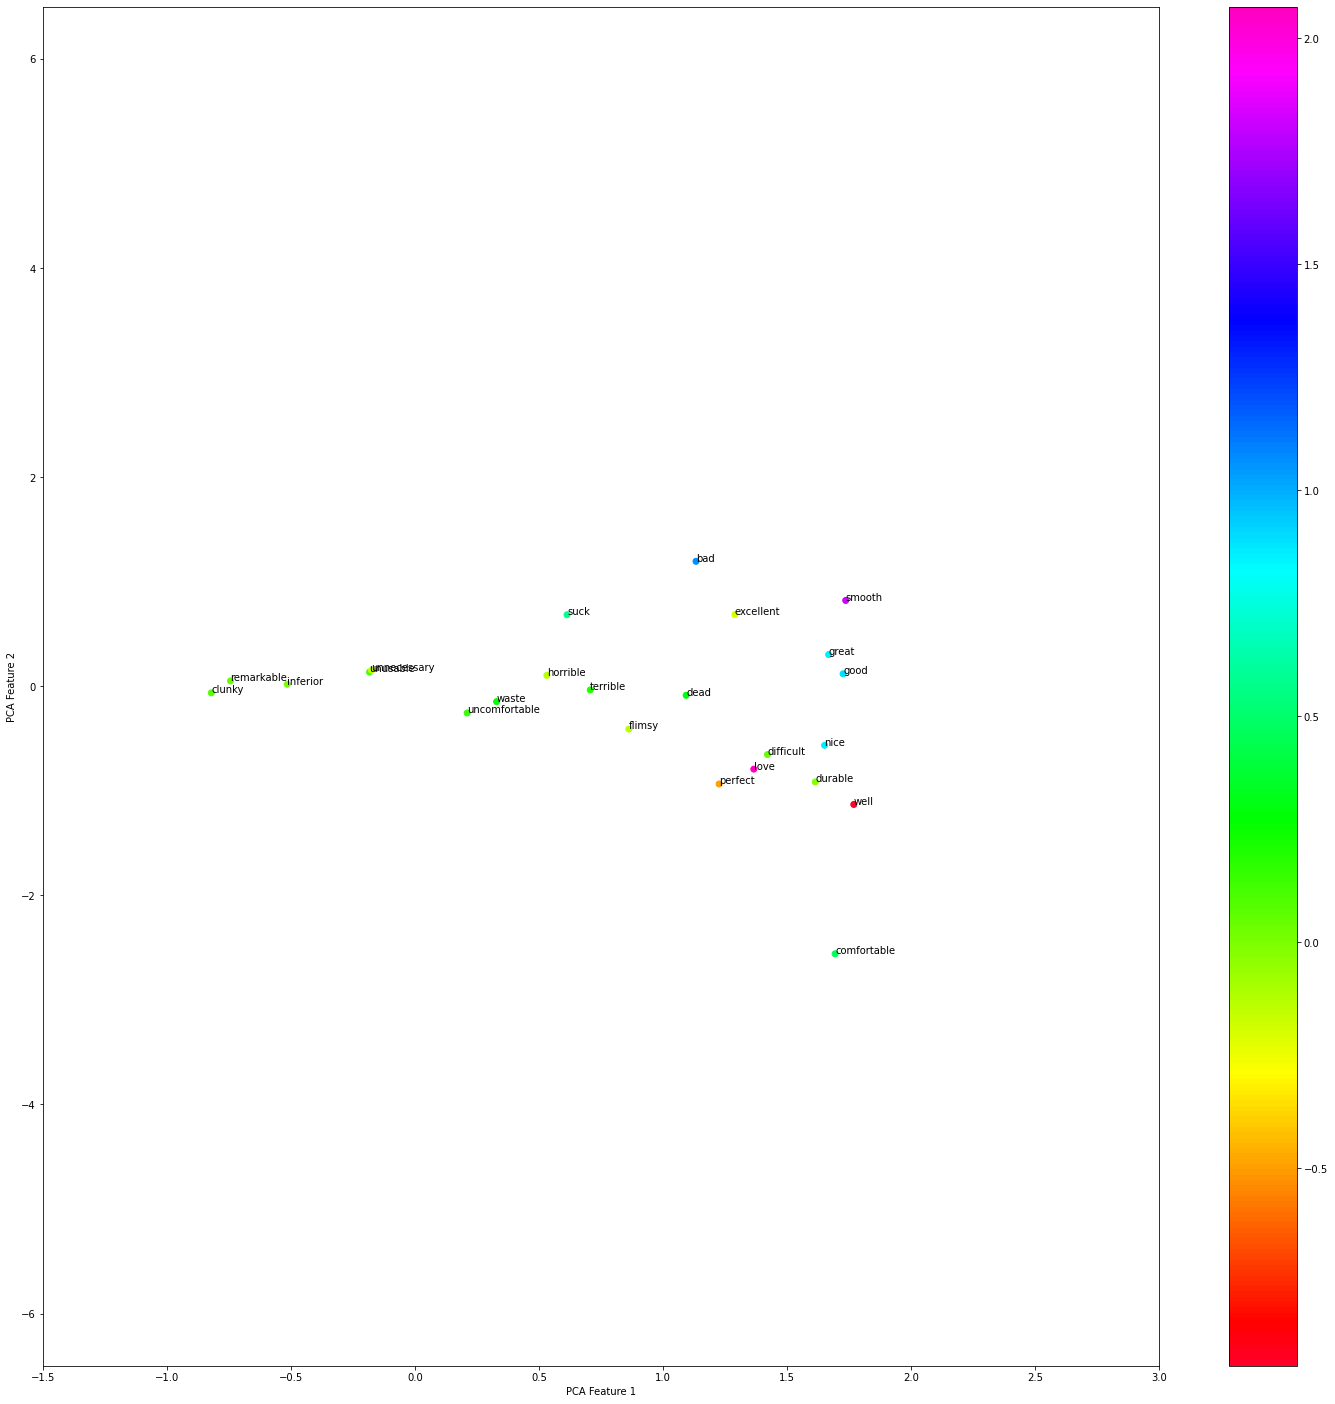

In [124]:
pos_words = ['good', 'great', 'nice', 'well', 'excellent', 'love', 'perfect', 'comfortable', 'durable', 'smooth', 'remarkable']
neg_words = ['bad', 'terrible', 'horrible', 'flimsy', 'inferior', 'uncomfortable', 'difficult', 'waste', 'suck', 'clunky', 'unusable', 'dead', 'unnecessary']
print(len(pos_words) - len(neg_words))
show_words(pos_words + neg_words, size_2d=(25, 25))

In [125]:
# Most common words
str(model.wv.index_to_key[:200])

"['guitar', 'one', 'string', 'sound', 'great', 'like', 'good', 'use', 'pedal', 'well', 'work', 'get', 'amp', 'would', 'price', 'pick', 'really', 'little', 'much', 'time', 'quality', 'tone', 'also', 'used', 'make', 'cable', 'nice', 'better', 'tuner', 'stand', 'doe', 'strap', 'need', 'thing', 'easy', 'using', 'play', 'bought', 'product', 'mic', 'even', 'year', 'buy', 'playing', 'look', 'want', 'way', 'set', 'acoustic', 'made', 'still', 'got', 'case', 'say', 'love', 'right', 'feel', 'instrument', 'bit', 'back', 'two', 'lot', 'bass', 'fit', 'first', 'best', 'problem', 'could', 'come', 'put', 'fender', 'enough', 'small', 'around', 'recommend', 'without', 'long', 'end', 'think', 'new', 'give', 'hold', 'effect', 'tune', 'cheap', 'last', 'keep', 'light', 'another', 'capo', 'know', 'take', 'high', 'different', 'pretty', 'power', 'find', 'review', 'many', 'perfect', 'fine', 'electric', 'looking', 'far', 'sure', 'see', 'try', 'microphone', 'something', 'never', 'though', 'recording', 'clean', 'lo

['guitar', 'piano', 'string', 'pedal', 'tuner', 'pick', 'acoustic', 'cable', 'tuner', 'instrument', 'capo', 'bass', 'speaker', 'board', 'metal', 'mic', 'microphone', 'knob', 'tube', 'volume', 'box', 'unit', 'switch', 'plastic', 'electric', 'music', 'line', 'plug', 'power', 'finger', 'bos', 'screw', 'studio', 'behringer', 'battery', 'control', 'bag', 'note', 'player', 'practice']
[1.66622   0.9777176 2.2203372 1.8084463 1.5452989 1.8958431 2.2496996
 1.7046403 1.5452989 1.3012564 1.847499  1.5094851 1.4487228 1.3828251
 1.5519918 1.7209876 1.7170813 1.9545491 2.0817037 2.3611917 1.0000812
 1.1347877 1.2509583 1.4848751 2.5398786 1.3242288 1.0992528 1.3835896
 2.3079534 1.7723783 1.5918859 1.6148133 1.6293117 1.4860998 1.7575213
 1.8835173 2.0753589 1.2565911 1.4757804 1.2629844]
[-3.4051306   0.1010575  -3.5161889   4.9070573  -3.4965127  -4.03561
 -3.027571    1.5081947  -3.4965127  -1.968147   -4.540444    0.32423598
  3.876925    2.6175165   1.4013698   1.4495773   1.9702377   3.7602

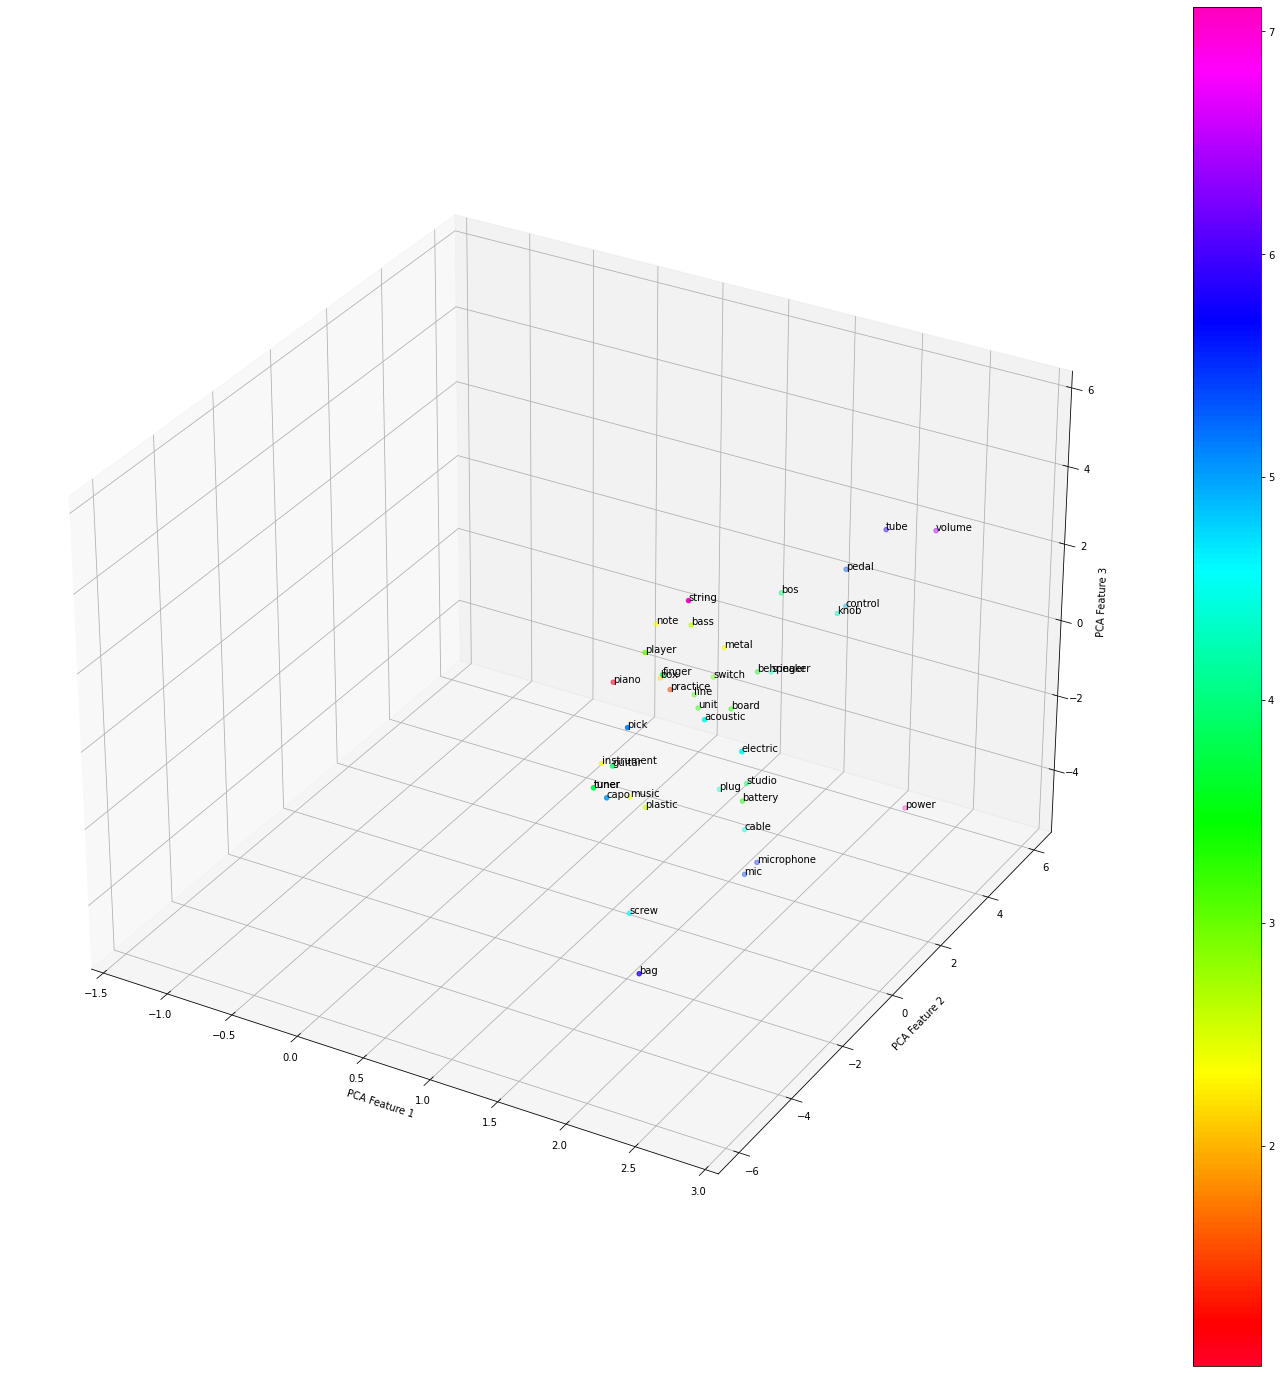

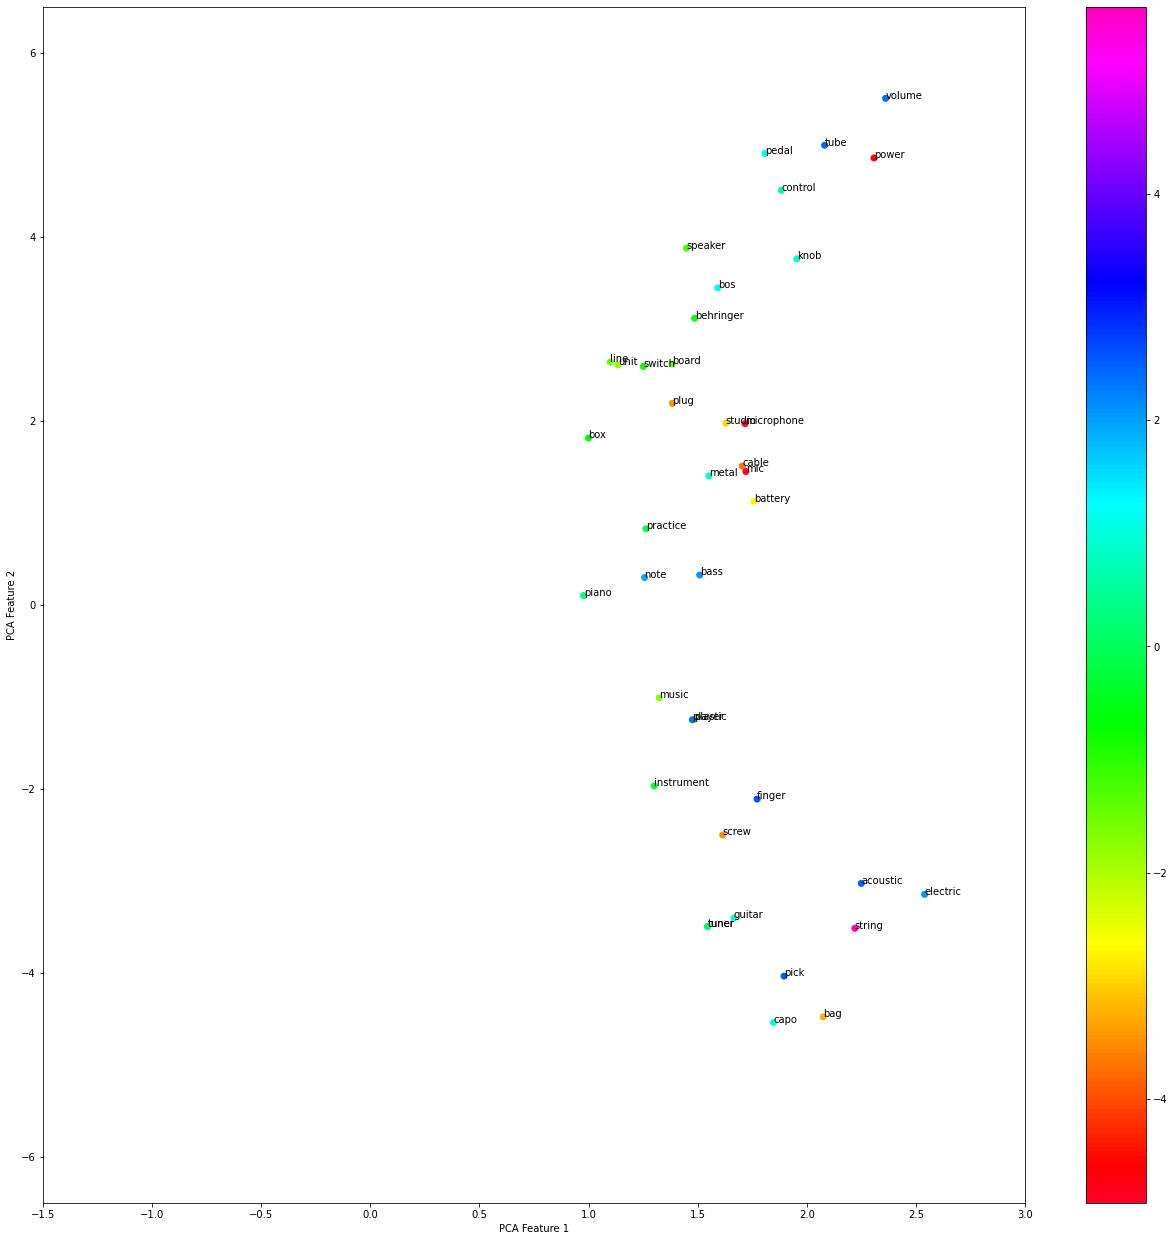

In [126]:
show_words(['guitar', 'piano', 'string', 'pedal', 'tuner', 'pick', 'acoustic', 'cable', 'tuner',
            'instrument', 'capo', 'bass', 'speaker', 'board', 'metal', 'mic', 'microphone', 'knob', 'tube',
            'volume', 'box', 'unit', 'switch', 'plastic', 'electric', 'music', 'line', 'plug', 'power',
            'finger', 'bos', 'screw', 'studio', 'behringer', 'battery', 'control', 'bag', 'note', 'player', 'practice'], size_2d=(22, 22))

['guitar', 'piano', 'string', 'pedal', 'tuner', 'pick', 'acoustic', 'cable', 'tuner', 'instrument', 'capo', 'bass', 'speaker', 'board', 'metal', 'mic', 'microphone', 'knob', 'tube', 'volume', 'box', 'unit', 'switch', 'plastic', 'electric', 'music', 'line', 'plug', 'power', 'finger', 'bos', 'screw', 'studio', 'behringer', 'battery', 'control', 'bag', 'note', 'player', 'practice']
[1.66622   0.9777176 2.2203372 1.8084463 1.5452989 1.8958431 2.2496996
 1.7046403 1.5452989 1.3012564 1.847499  1.5094851 1.4487228 1.3828251
 1.5519918 1.7209876 1.7170813 1.9545491 2.0817037 2.3611917 1.0000812
 1.1347877 1.2509583 1.4848751 2.5398786 1.3242288 1.0992528 1.3835896
 2.3079534 1.7723783 1.5918859 1.6148133 1.6293117 1.4860998 1.7575213
 1.8835173 2.0753589 1.2565911 1.4757804 1.2629844]
[-3.4051306   0.1010575  -3.5161889   4.9070573  -3.4965127  -4.03561
 -3.027571    1.5081947  -3.4965127  -1.968147   -4.540444    0.32423598
  3.876925    2.6175165   1.4013698   1.4495773   1.9702377   3.7602

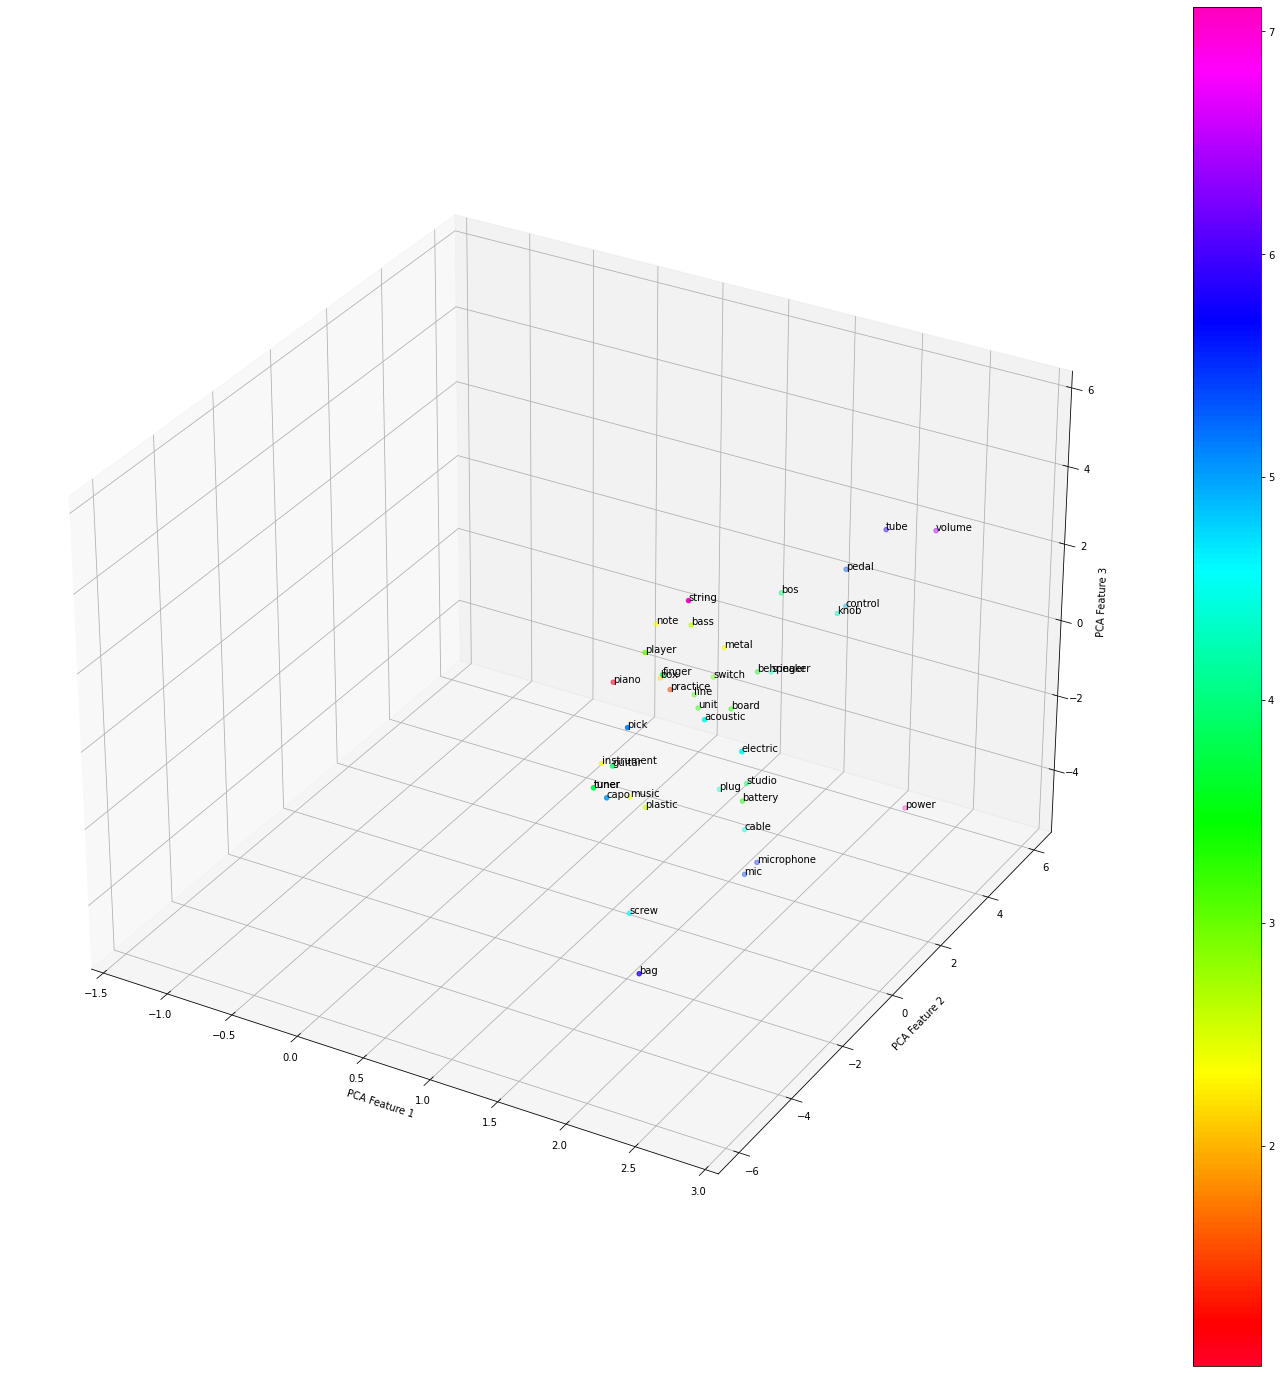

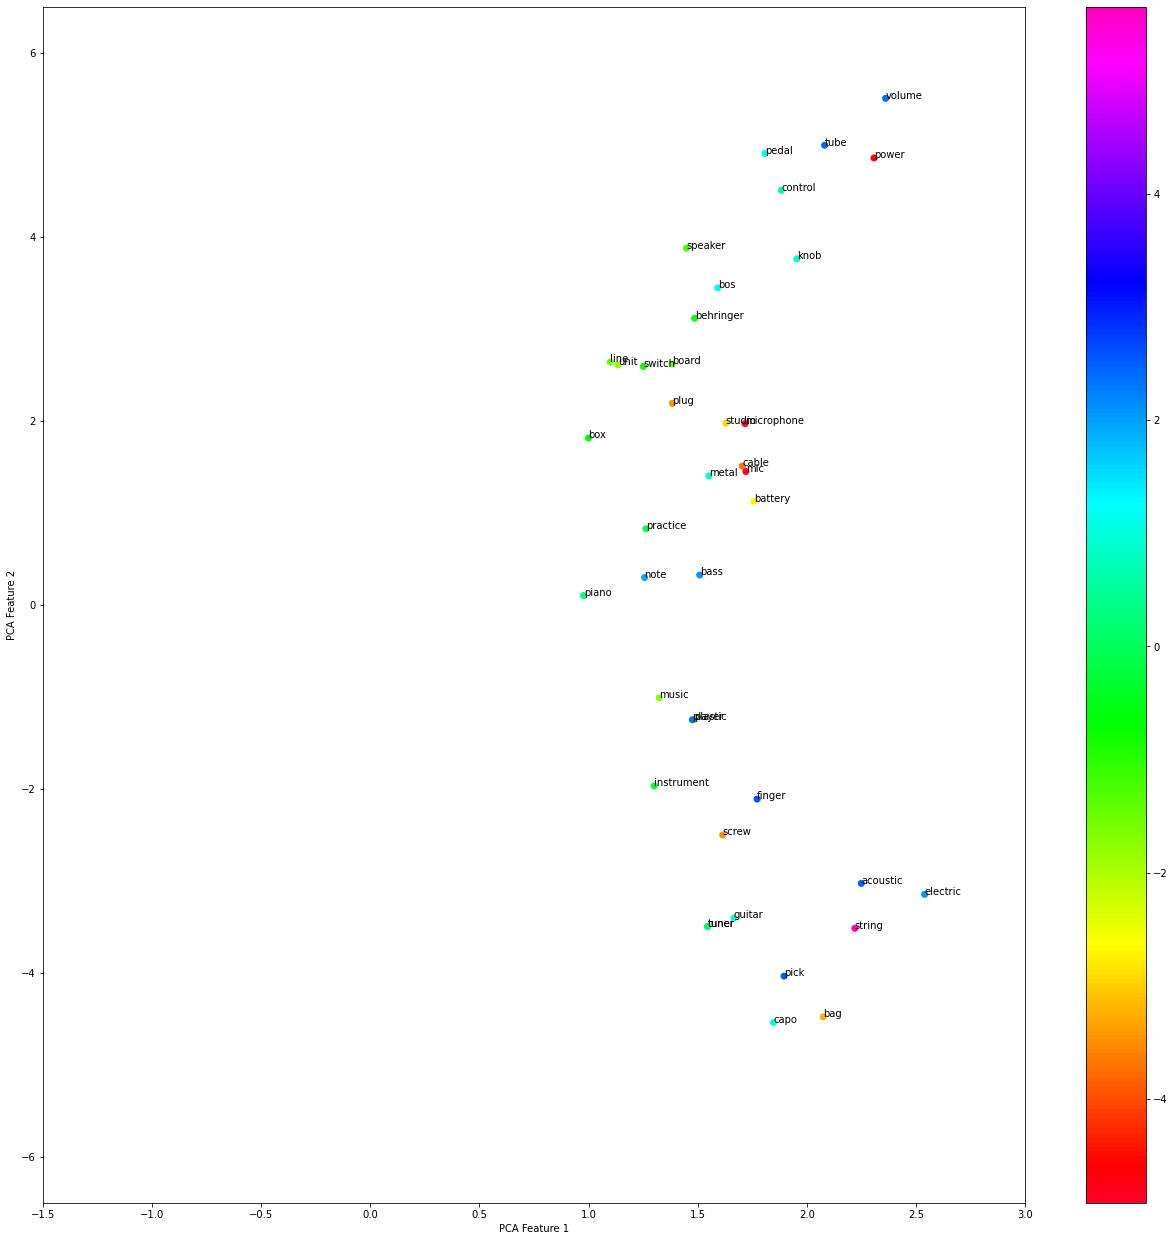

In [127]:
show_words(['guitar', 'piano', 'string', 'pedal', 'tuner', 'pick', 'acoustic', 'cable', 'tuner',
            'instrument', 'capo', 'bass', 'speaker', 'board', 'metal', 'mic', 'microphone', 'knob', 'tube',
            'volume', 'box', 'unit', 'switch', 'plastic', 'electric', 'music', 'line', 'plug', 'power',
            'finger', 'bos', 'screw', 'studio', 'behringer', 'battery', 'control', 'bag', 'note', 'player', 'practice'], size_2d=(22, 22))